<a href="https://colab.research.google.com/github/ZoeMcFife/5AHITM/blob/main/INSY/Colab/%232024-10-17%23/explore-hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your name:

-   **Name**: Bunea

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

The data shows how users’ mobility patterns - what types of places they
spend time in - varied over the course of the COVID-19 pandemic.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

When you are finished, make sure you have run all of the cells in the
notebook (in order), and then create a PDF from it. Submit the PDF on
Gradescope.

**Important note**: You won’t necessarily have learned or seen in
advance how to use all the Python commands and library functions you
need to complete this assignment. That’s OK. Part of the learning
objective here is to practice finding and applying that kind of new
information as you go! Use the library documentation, search the
Internet, or ask questions on Ed if you need any help.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
# TODO Q1
url = "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df = pd.read_csv(url)

<ipython-input-3-d83a71b3868c>:3: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [4]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11730025 entries, 0 to 11730024
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline 

In [5]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [6]:
# TODO Q4
df['date'] = pd.to_datetime(df['date'])


Next, you are going to extract the subset of data for the U.S. state of
your choice. You can choose any location *except* New York.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single U.S. state (but *not* New York).

In [7]:
# TODO Q5
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("California")) & (df['sub_region_2'].isnull())]

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

Also check whether there are any missing rows of data. What date range
is represented in this data? Is every day within that range included in
the data?

In [8]:
# TODO Q6
# df_subset

df_subset.isnull().sum()

min_dt = df_subset.date.min()
max_dt = df_subset.date.max()

expected_range = pd.date_range(start = min_dt, end = max_dt, freq="D")

missing_days = expected_range.difference(df_subset.date)

print(missing_days)


DatetimeIndex([], dtype='datetime64[ns]', freq='D')


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? (Even if, for
the U.S. state you have chosen, the data is complete, explain why some
data may be missing for other regions.)

**Include a short quote from the material you read in the “Learn about
the data” section to answer this question. Indicate that it is a quote
using quotation marks or a block quote, and cite the source, including a
URL.**

- No relevant data is missing
- Data Missing due to not enough data or data doesn't meet the quality standards

> "You might see data gaps for some categories in your region. These gaps are intentional and happen because the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity." - ([Google](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927))

To track trends in cases and vaccinations alongside mobility trends, we
can also read in data from several other sources. For example,

-   Our World in Data distributes data about COVID-19 vaccination status
    over time for U.S. states in their [Github
    repository](https://github.com/owid/covid-19-data).
-   The New York Times distributes data about COVID-19 cumulative cases
    over time for U.S. states in their [Github
    repository](https://github.com/nytimes/covid-19-data).

You can choose whether to look at vaccination trends or case trends for
the U.S. state you have selected. Use one of the following cells to read
in the data, convert the `date` field to a `datetime`, and get the
subset of the data that applies to the specific U.S. state for which you
are exploring mobility data.

Then, use `pandas` functions to check your new data frame and look at
the first few rows of data.

In [9]:
# TODO Q8 - Vaccinations option

url_vax = 'https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv'
df_vax = pd.read_csv(url_vax)
df_vax['date'] = pd.to_datetime(df_vax.date)

df_vax_subset = df_vax[(df_vax['location'].eq("California"))]

# check the data frame and look at a few rows

df_vax_subset.sample(5)


,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,total_boosters,total_boosters_per_hundred
5220,2021-05-18,California,35518035.0,44976950.0,21168286.0,38.95,89.89,15391309.0,53.57,113.83,176297.0,269324.0,6816.0,0.790,NaN,NaN
5274,2021-07-11,California,43609176.0,49668485.0,24731993.0,51.06,110.37,20176353.0,62.59,125.70,101697.0,75252.0,1905.0,0.878,NaN,NaN
5533,2022-03-27,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59667.0,1510.0,NaN,NaN,NaN
5280,2021-07-17,California,44032614.0,49902535.0,24954403.0,51.60,111.44,20388530.0,63.16,126.30,78534.0,75019.0,1899.0,0.882,NaN,NaN
5457,2022-01-10,California,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146626.0,3711.0,NaN,NaN,NaN


In [10]:
# TODO Q8 - Cases option

url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)
df_cases['date'] = pd.to_datetime(df_cases.date)

df_cases_subset = df_cases[(df_cases.state.eq("California"))]
# check the data frame and look at a few rows

df_cases_subset.sample(5)

,date,state,fips,cases,deaths
10798,2020-09-15,California,6,769918,14606
10523,2020-09-10,California,6,753019,14094
6178,2020-06-23,California,6,191039,5637
25483,2021-06-09,California,6,3799174,63167
36803,2021-12-30,California,6,5457967,76644


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen, alongside either
vaccination trends or cases trends.

In the following cell, create a figure with seven subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the date.
On the vertical axes, show (as a line):

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the next subplot
-   either COVID-19 cases or vaccinations in the bottom subplot

Make sure to clearly label each axis. Use `matplotlib` library
documentation to adjust your figures and make your plot look nice!

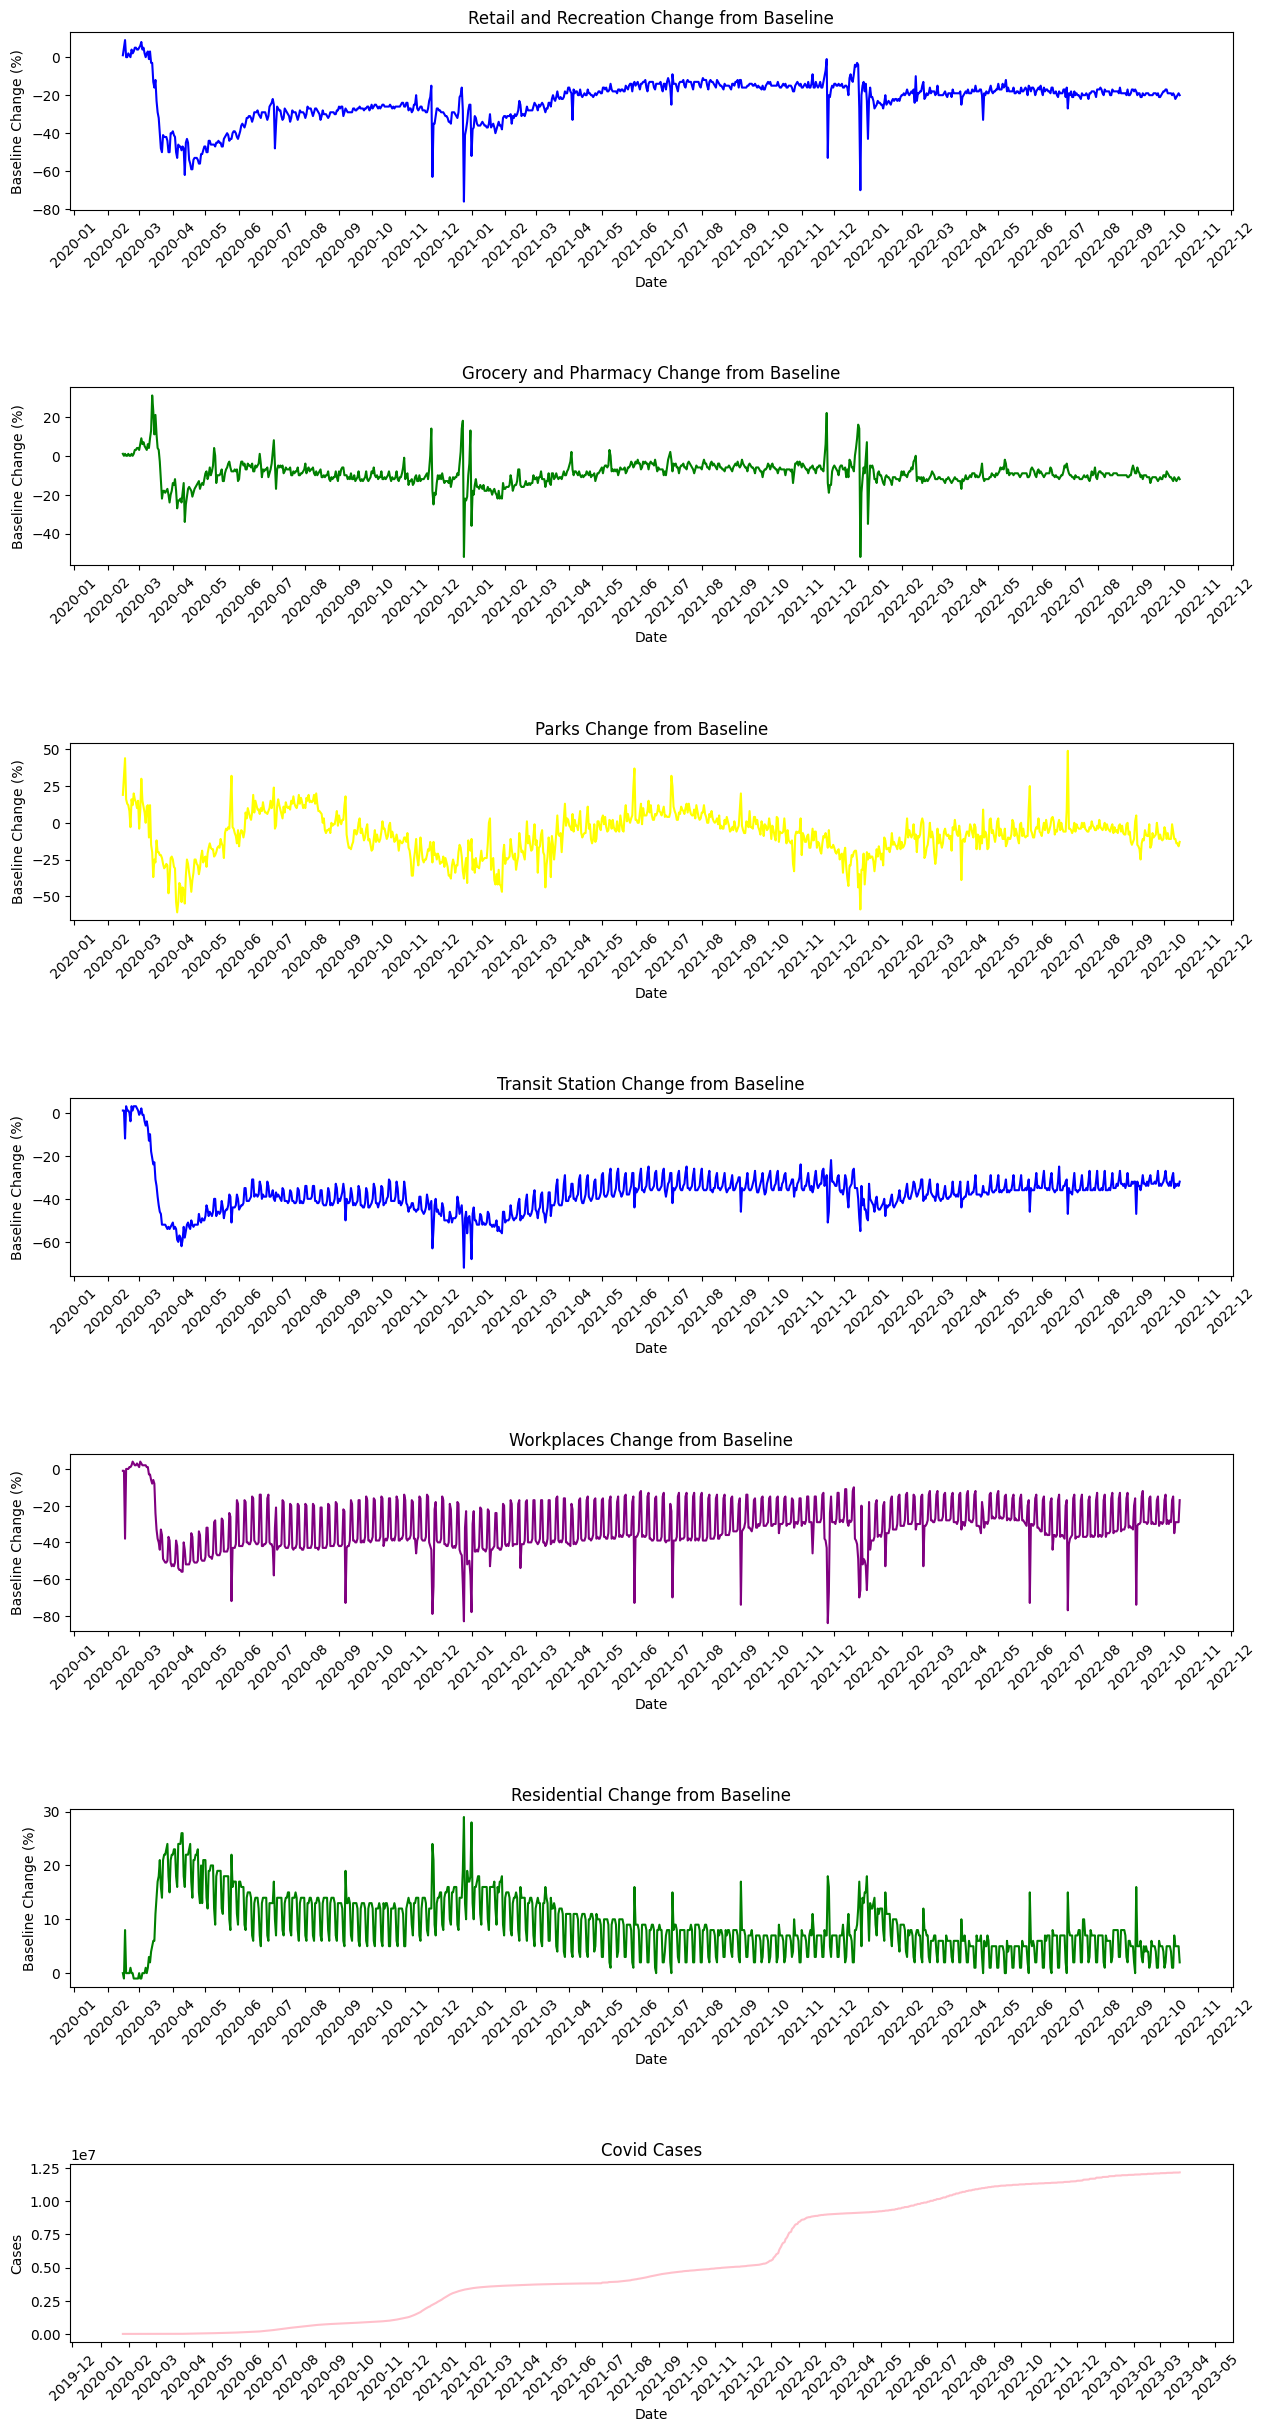

In [38]:
# TODO Q9
# create visualization

y1 = df_subset.retail_and_recreation_percent_change_from_baseline
y2 = df_subset.grocery_and_pharmacy_percent_change_from_baseline
y3 = df_subset.parks_percent_change_from_baseline
y4 = df_subset.transit_stations_percent_change_from_baseline
y5 = df_subset.workplaces_percent_change_from_baseline
y6 = df_subset.residential_percent_change_from_baseline
y7 = df_cases_subset.cases
x2 = df_cases_subset.date
x = df_subset.date

plt.figure(figsize=(15, 30))

# Subplot 1

plt.subplot(7, 1, 1)
plt.plot(x, y1, color="blue")
plt.xlabel("Date")
plt.ylabel("Baseline Change (%)")
plt.title("Retail and Recreation Change from Baseline")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Subplot2

plt.subplot(7, 1, 2)
plt.plot(x, y2, color="green")
plt.xlabel("Date")
plt.ylabel("Baseline Change (%)")
plt.title("Grocery and Pharmacy Change from Baseline")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Subplot3
plt.subplot(7, 1, 3)
plt.plot(x, y3, color="yellow")
plt.xlabel("Date")
plt.ylabel("Baseline Change (%)")
plt.title("Parks Change from Baseline")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Subplot4

plt.subplot(7, 1, 4)
plt.plot(x, y4, color="blue")
plt.xlabel("Date")
plt.ylabel("Baseline Change (%)")
plt.title("Transit Station Change from Baseline")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Subplot5

plt.subplot(7, 1, 5)
plt.plot(x, y5, color="purple")
plt.xlabel("Date")
plt.ylabel("Baseline Change (%)")
plt.title("Workplaces Change from Baseline")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Subplot6

plt.subplot(7, 1, 6)
plt.plot(x, y6, color="green")
plt.xlabel("Date")
plt.ylabel("Baseline Change (%)")
plt.title("Residential Change from Baseline")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#Subplot7

plt.subplot(7, 1, 7)
plt.plot(x2, y7, color="pink")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.title("Covid Cases")
plt.xticks(rotation=45)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))


plt.subplots_adjust(hspace=1)

plt.show()

**TODO** Q10: Answer the following questions:

-   Do the results seem to satisfy “common sense”?

    - yes

-   Make sure to explain any trends, patterns, or notable anomalies
    observed in your mobility data.

  - **Retail and Recreation:** Sharp decline at the beginning of 2020, slowly rising afterwards, spikes around end of november and december, related to holidays.
  - **Grocery and Pharmacy:** Increase at the beginning of 2020, --> panic buying at the begin of the pandemic, etc, stabilizes at a bit below the baseline with spikes around christmas
  - **Parks:** Increase during summer / warmer months
  - **Transit Stations:** heavy decline due to lockdowns
  - **Workplaces:** decreased throughout 2020, 2021 and 2022
  - **Residential:** highly increased after 2020, due to people staying at home / working from home

-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to COVID-19 cases, non-pharmaceutical
    interventions such as stay-at-home orders, or vaccinations?

  -  Retail, Transit, Workplace, Residential

-   Which trends, patterns, or notable anomalies in the mobility data
    are likely related to other factors?

  - parks,

-   Cite specific evidence from your plot to support your answer.

  -

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why their mobility data
might *not* be useful for understanding the effect of COVID-19-related
interventions, or why the data might be misleading.

-   For the U.S. state you have chosen, briefly answer *all* of the
    questions in that checklist, and explain how your answer affects the
    validity of the data.

-   Based on your answers, do you think there are any serious problems
    associated with using this data for understanding user mobility
    changes due to COVID-19?